In [ ]:
from numpy import *
import matplotlib.pyplot as plt

x = arange(0, 10, 0.1)
x = expand_dims(x, 1)
noise = 2*random.randn(*x.shape)
y = 5*x+10 + noise

points = concatenate((x,y), axis=1)


# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * ((y - ((m_current * x) + b_current)))
        m_gradient += -(2/N) * (x * (y - ((m_current * x) + b_current)))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, 
                            num_iterations):
    b = starting_b
    m = starting_m
    loss = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        loss.append(compute_error_for_line_given_points(b, m, points))

    return b, m, loss

def run():
    learning_rate = 0.01 # learning rate 
    initial_b = 20 # initial y-intercept guess
    initial_m = 50 # initial slope guess
    num_iterations = 1000 # number of iteration, epoch 
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, 
    compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    b, m , loss = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(
        num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    return b, m, loss

# ส่วนใหม่

In [ ]:
b, m, loss = run()
print(len(loss))

Starting gradient descent at b = 20, m = 50, error = 71013.65309054643
Running...
After 1000 iterations b = 9.644941192149991, m = 5.065953015455781, error = 3.8494881792289473
1000


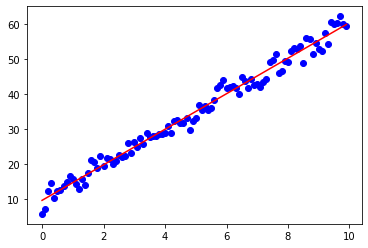

In [ ]:
plt.plot(x,y,'bo')
plt.plot(x, m*x+b,'r')
plt.show()

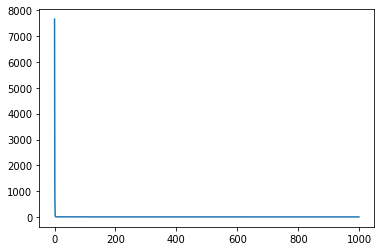

In [ ]:
plt.plot(arange(len(loss)), loss)
# plt.plot(arange(10), loss[:10])
plt.show()
